<a href="https://colab.research.google.com/github/ishika1228/Data-Analysis--Cognifyz/blob/main/Cognifyz_Technologies_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:




from google.colab import files


uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud

In [10]:
df = pd.read_csv('Dataset .csv')


In [11]:
# Task 1: City Analysis
city_counts = df['City'].value_counts()
most_restaurants_city = city_counts.idxmax()
avg_rating_per_city = df.groupby('City')['Aggregate rating'].mean()
highest_avg_rating_city = avg_rating_per_city.idxmax()


In [12]:
print(f"City with the highest number of restaurants: {most_restaurants_city}")
print(f"City with the highest average rating: {highest_avg_rating_city}")


City with the highest number of restaurants: New Delhi
City with the highest average rating: Inner City


<ipython-input-13-d8a29f1b0f36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price range', data=df, palette='viridis')


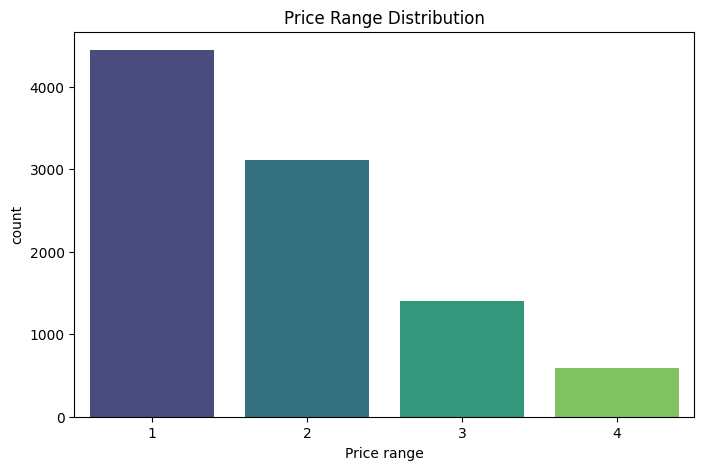

In [13]:
# Task 2: Price Range Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Price range', data=df, palette='viridis')
plt.title('Price Range Distribution')
plt.show()

In [14]:
price_percentage = df['Price range'].value_counts(normalize=True) * 100
print("Percentage of restaurants in each price range:")
print(price_percentage)

Percentage of restaurants in each price range:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


In [15]:
# Task 3: Online Delivery
delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100
print("Percentage of restaurants with online delivery:")
print(delivery_percentage)

Percentage of restaurants with online delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


In [16]:
avg_rating_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print("Average ratings of restaurants with and without online delivery:")
print(avg_rating_delivery)

Average ratings of restaurants with and without online delivery:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


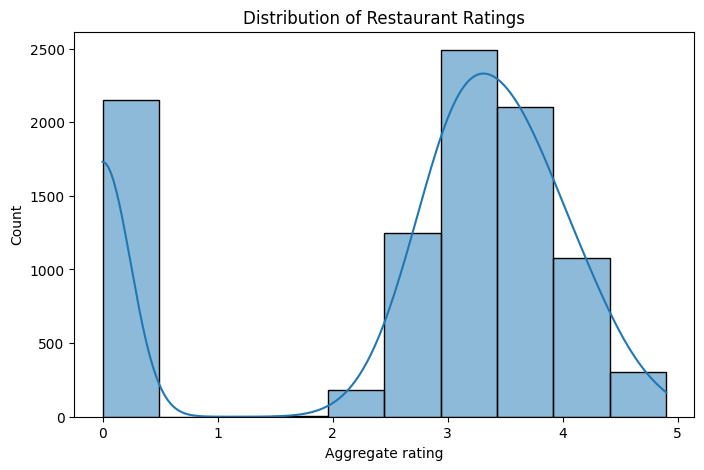

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.show()

In [18]:
most_common_rating_range = df['Aggregate rating'].value_counts().idxmax()
print(f"Most common rating: {most_common_rating_range}")

Most common rating: 0.0


In [19]:
avg_votes = df['Votes'].mean()
print(f"Average number of votes per restaurant: {avg_votes}")

Average number of votes per restaurant: 156.909747670401


In [20]:
# Task 5: Cuisine Combination
cuisine_combinations = df['Cuisines'].dropna().str.split(', ').explode().value_counts()
print("Most common cuisine combinations:")
print(cuisine_combinations.head(10))


Most common cuisine combinations:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


In [21]:
# Task 6: Geographic Analysis
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)
for _, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(map)
map.save("restaurants_map.html")

In [22]:
# Task 7: Restaurant Chains
restaurant_chains = df['Restaurant Name'].value_counts()
print("Most common restaurant chains:")
print(restaurant_chains.head(10))

Most common restaurant chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


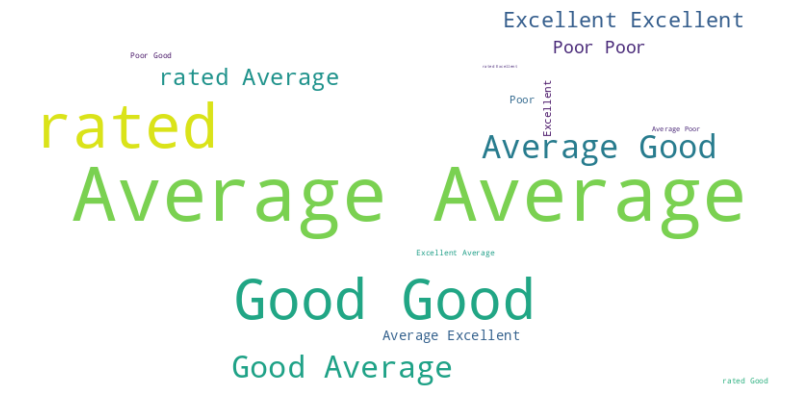

In [23]:
# Task 8: Restaurant Reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Rating text'].dropna()))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# Task 9: Votes Analysis
highest_votes_restaurant = df.loc[df['Votes'].idxmax(), 'Restaurant Name']
lowest_votes_restaurant = df.loc[df['Votes'].idxmin(), 'Restaurant Name']
print(f"Restaurant with highest votes: {highest_votes_restaurant}")
print(f"Restaurant with lowest votes: {lowest_votes_restaurant}")


Restaurant with highest votes: Toit
Restaurant with lowest votes: Cantinho da Gula


In [25]:
# Task 10: Price Range vs Online Delivery and Table Booking
price_vs_services = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].value_counts(normalize=True) * 100
print("Price Range vs Online Delivery and Table Booking:")
print(price_vs_services)

Price Range vs Online Delivery and Table Booking:
Price range  Has Online delivery  Has Table booking
1            No                   No                   84.225923
             Yes                  No                   15.751575
                                  Yes                   0.022502
2            No                   No                   54.963058
             Yes                  No                   37.359460
                                  Yes                   3.951173
             No                   Yes                   3.726309
3            No                   No                   44.318182
                                  Yes                  26.491477
             Yes                  Yes                  19.247159
                                  No                    9.943182
4            No                   No                   51.023891
                                  Yes                  39.931741
             Yes                  Yes                